#Parcial 3
*Camilo Rafael Pérez Chaves* -
*112757564*
>27 de frebrero del 2025
😀💥
---

---





In [276]:
#Importando librerías
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/data


###Punto 1)

Ajustar una curva cúbica a los datos. Grossman pag.444

\begin{array}{|c|c|}
\hline
X_i & Y_i \\
\hline
0.00 & 1.000 \\
0.15 & 1.004 \\
0.31 & 1.031 \\
0.50 & 1.117 \\
0.60 & 1.223 \\
0.75 & 1.422 \\
\hline
\end{array}

[GROSSMAN-- ALGEBRA LINEAL.pdf](https://drive.google.com/file/d/1t_BgZvgnNShi-xUR3rsyR8gB5ouNCCbS/view?usp=sharing)

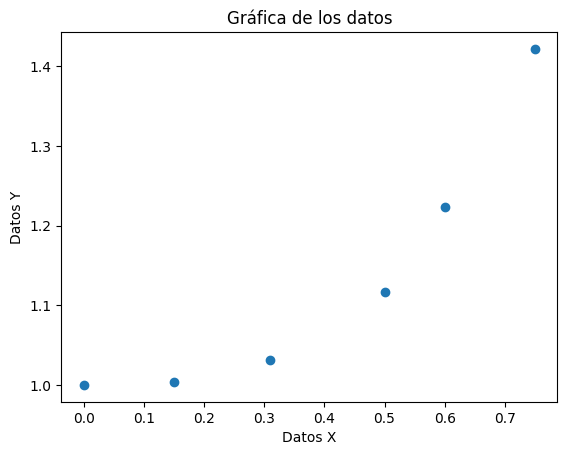

In [277]:
#Grafiquemos los datos dados usando la librería matplotlib
xi = [0, 0.15, 0.31, 0.50, 0.60, 0.75]
yi = [1, 1.004, 1.031, 1.117, 1.223, 1.422]
plt.plot(xi, yi,'o')
#Recordemos que el último parámetro especifica el tipo de forma que
#queremos graficar
plt.xlabel('Datos X')
plt.ylabel('Datos Y')
plt.title('Gráfica de los datos')
plt.show()

In [278]:
#Esta es una forma de tener los datos organizados y extraerlos después
datos = pd.read_csv("hokaaa.csv", sep=";", dtype=float)
datos['(xi)^2'] = datos['xi'] ** 2
datos['(xi)^3'] = datos['xi'] ** 3
datos

,xi,yi,(xi)^2,(xi)^3
0,0.00,1.000,0.0000,0.000000
1,0.15,1.004,0.0225,0.003375
2,0.31,1.031,0.0961,0.029791
3,0.50,1.117,0.2500,0.125000
4,0.60,1.223,0.3600,0.216000
5,1.75,1.422,3.0625,5.359375


Planteamos el sistema de ecuaciones asi,


$$
1.000 = a +b(0.00)+c(0.00)^2+d(0.00)^3
$$

$$
1.004 = a +b(0.15)+c(0.15)^2+d(0.15)^3
$$

$$
1.031 = a +b(0.31)+c(0.31)^2+d(0.31)^3
$$
$$\vdots$$
$$
1.422 = a +b(1.75)+c(1.75)^2+d(1.75)^3
$$

tal que $y = Au$ dónde

$$
A = \begin{bmatrix}
(1) & (x_1) & x_1^2 & x_1^3 \\
(1) & (x_2) & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots\\
(1) & (x_6) & x_6^2 & x_6^3 \\
\end{bmatrix},
y=\begin{bmatrix}
1.000\\
1.004\\
\vdots\\
1.422\\
\end{bmatrix} y
u = \begin{bmatrix}
a\\
b\\
\vdots\\
d\\
\end{bmatrix}
$$


In [279]:
# Crear la matriz A con los datos dados
matriz = np.array([
    [1, xi[0], (xi[0])**2, (xi[0])**3],
    [1, xi[1], (xi[1])**2, (xi[1])**3],
    [1, xi[2], (xi[2])**2, (xi[2])**3],
    [1, xi[3], (xi[3])**2, (xi[3])**3],
    [1, xi[4], (xi[4])**2, (xi[4])**3],
    [1, xi[5], (xi[5])**2, (xi[5])**3],
])

matriz_transpuesta = np.transpose(matriz)

vector_y = np.array([1, 1.004, 1.031, 1.117, 1.223, 1.422])
matriz

print(f'Matriz A:\n{matriz}')
print(f'Matriz transpuesta de A:\n{matriz}')
print(f'Vector Y:\n{vector_y}')

Matriz A:
[[1.       0.       0.       0.      ]
 [1.       0.15     0.0225   0.003375]
 [1.       0.31     0.0961   0.029791]
 [1.       0.5      0.25     0.125   ]
 [1.       0.6      0.36     0.216   ]
 [1.       0.75     0.5625   0.421875]]
Matriz transpuesta de A:
[[1.       0.       0.       0.      ]
 [1.       0.15     0.0225   0.003375]
 [1.       0.31     0.0961   0.029791]
 [1.       0.5      0.25     0.125   ]
 [1.       0.6      0.36     0.216   ]
 [1.       0.75     0.5625   0.421875]]
Vector Y:
[1.    1.004 1.031 1.117 1.223 1.422]


In [280]:
#ahora diseñemos el modelo para determinar que curva se asemeja más
mult = np.matmul(matriz_transpuesta, matriz)

inversa = np.linalg.inv(mult)
resultado = np.matmul(inversa, matriz_transpuesta)
resultado_final = np.matmul(resultado, vector_y)
resultado_final

array([ 1.00043981, -0.00154099, -0.01150567,  1.02102256])

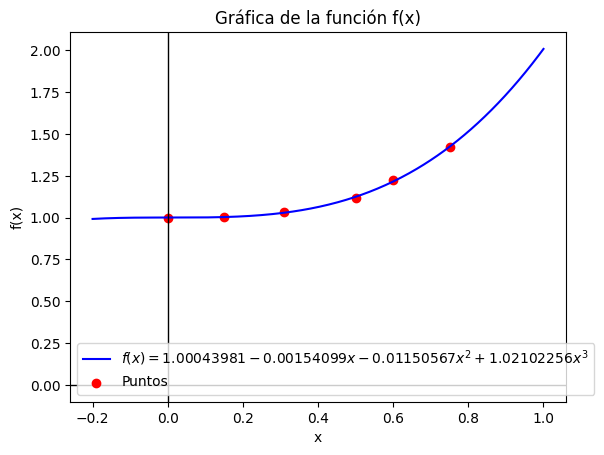

In [281]:
#Hemos calculado los parámetros necesarios para constuir la curva
#que mas se asemeja a la distribución de los puntos, grafiquemos esta curva

def f(x):
    return 1.00043981 - 0.00154099 * x - 0.01150567 * x**2 + 1.02102256 * x**3

x = np.linspace(-1/5, 1, 400)

y = f(x)

plt.plot(x, y, label=r'$f(x) = 1.00043981 - 0.00154099 x - 0.01150567 x^2 + 1.02102256 x^3$', color='blue')
plt.scatter(xi, yi, label='Puntos', color='red')

plt.axhline(0, color='black', linewidth=1)  # Eje X
plt.axvline(0, color='black', linewidth=1)  # Eje Y
plt.title('Gráfica de la función f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()


###Algoritmo de la secante
2. Implementar el algoritmo de la secante para aproximación de raíces
y úselo para encontrar una raíz del polinomio

$$f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$$

Burden pag. 72

[BURDEN NUMERICAL ANALYSIS ED 09.pdf](https://drive.google.com/file/d/1dmYwI3YpMelYEzpX5OlxPdIAHZxICqST/view?usp=sharing)



---


### Método de la Secante para Estimar Raíces

El método de la secante es un método numérico utilizado para encontrar aproximaciones de las raíces de una función $f(x) = 0$. A diferencia del método de Newton-Raphson, no requiere el cálculo de la derivada, sino que utiliza una aproximación mediante una secante entre dos puntos iniciales.

Dado dos puntos iniciales $x_0$ y $x_1$, la siguiente aproximación se calcula con la fórmula:
$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$



---



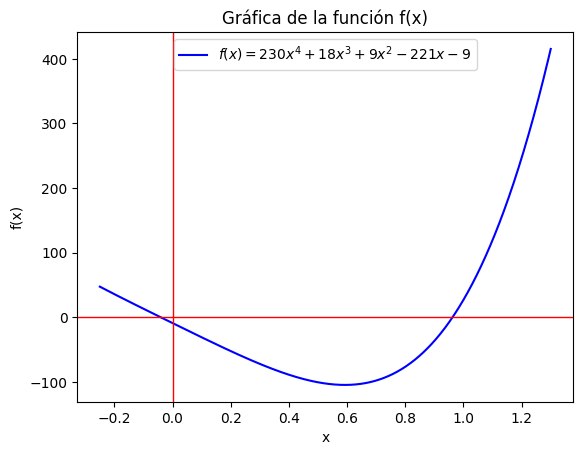

In [282]:
#Realicemos un bosquejo de la gráfica para ver en donde pueden estar
#las posibles raíces, y así determinar el valor de inicio

def g(x):
    return -9 - (221 * x) + 9 * x**2 + 18 * x**3 + 230 * x**4

#Escojamos valores óptimos para graficar la función de manera óptima
x_data = np.linspace(-0.25, 1.3, 1000)

y_data = g(x_data)

plt.plot(x_data, y_data, label=r'$f(x) = 230 x^4 + 18 x^3 + 9x^2  - 221 x -9 $', color='blue')

plt.axhline(0, color='red', linewidth=1)  # Eje X
plt.axvline(0, color='red', linewidth=1)  # Eje Y
plt.title('Gráfica de la función f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()


In [283]:
#Definimos la función que nos dara una proximación a la raíces de esta función
def secante_aprox(f, x0, x1, N):
  for k in range(1, N+1):
    x2 = x1 - (f(x1) * (x1 - x0)) / (f(x1) - f(x0))
  x0=x1
  x1=x2
  return x2

In [284]:
funcion= lambda x: 230*(x**4)+18*(x**3)+9*(x**2)-221*x-9

Podemos ver por la gráfica que la función tiene dos raíces reales una menor que 0 y otra mayor que cero. Entonces escojamos los valores de inico y fin tal que la aproximación sea la más exacta posible.

In [285]:
secante_aprox(funcion, 1, 5, 10)

#Esta es la ráiz positiva cercana a 1

0.9992556036502993

In [286]:
secante_aprox(funcion, -5, 0, 100)

#Esta es la ráiz negativa cercana a 0

-0.000315059861373661

En esta gráfica vemos los valores reales y las estimaciones


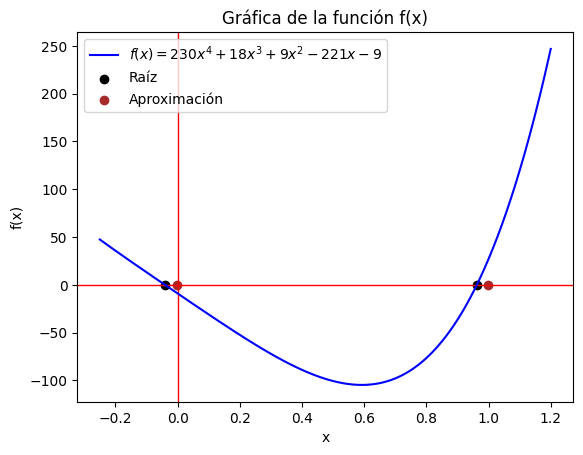

In [287]:
x_r = (-0.04065,0.96239)
x_s = (-0.000315059861373661, 0.9992556036502993)

print("En esta gráfica vemos los valores reales y las estimaciones")

def g(x):
    return -9 - (221 * x) + 9 * x**2 + 18 * x**3 + 230 * x**4

x_data = np.linspace(-0.25, 1.2, 1000)

y_data = g(x_data)


plt.axhline(0, color='red', linewidth=1)  # Eje X
plt.axvline(0, color='red', linewidth=1)  # Eje Y

plt.plot(x_data, y_data, label=r'$f(x) = 230 x^4 + 18 x^3 + 9x^2  - 221 x -9 $', color='blue')
plt.scatter(x_r, [0,0], label='Raíz', color='black')

plt.scatter(x_s, [0,0], label='Aproximación', color='brown')

plt.title('Gráfica de la función f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.legend()


###Serie de Fourier
3. Crear funciones que permitan graficar
$$S_f(x, N) = \frac{1}{2\pi} + \frac{2}{\pi} \sum_{k=1}^{N} \frac{1 - \cos(2k)}{4k^2}cos(kx)$$

  para cualquier intervalo N y para x en un intervalo [a,b], por ejemplo
N= 3,8,15 en [-10,10].

In [288]:
def sumatoria(x, N):
  sum = 0
  for k in range(1, N):
    denominador = 1-np.cos(2*k)
    numerador = 4*(k**2)
    sum+=(denominador/numerador)*np.cos(k*x)
  return (1/(2*np.pi))+(2/np.pi)*sum

In [289]:
sumatoria(np.pi/3, 10)

0.23739318226630607

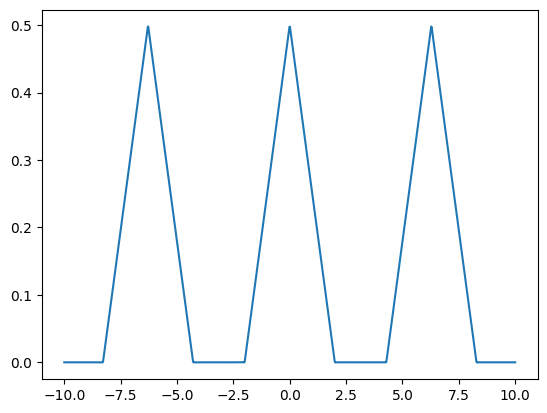

In [303]:
#Ahor agrafiquemos la serie
def graficar_serie(inicio, final, N):
  x_var = np.linspace(inicio, final, 1000)
  y_var = sumatoria(x_var, N)
  plt.plot(x_var, y_var)
  return plt.show()

graficar_serie(-10, 10, 100)